### Problem Statement
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.


In [459]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')





In [460]:
#loading the database
df = pd.read_csv(r'flight_data.csv')

### Overview of the Dataset 

In [461]:
#top 10 rows
df.head(10)

,Unnamed: 0,Airline_Name,Source,Destination,Departure_time,Arrival_time,Date of Journey,Number of stops,Duration,Price
0,0,Go First,New Delhi,Mumbai,06:05,10:20,"Sat, 4 Jun",1 Stop,4h 15m,"8,053"
1,1,Go First,New Delhi,Mumbai,06:05,15:00,"Sat, 4 Jun",1 Stop,8h 55m,"8,053"
2,2,SpiceJet,New Delhi,Mumbai,20:00,10:30\n+ 1 day,"Sat, 4 Jun",1 Stop,14h 30m,"8,053"
3,3,IndiGo,New Delhi,Mumbai,06:30,08:35,"Sat, 4 Jun",Non Stop,2h 05m,"8,054"
4,4,IndiGo,New Delhi,Mumbai,05:30,07:40,"Sat, 4 Jun",Non Stop,2h 10m,"8,054"
5,5,IndiGo,New Delhi,Mumbai,08:45,11:00,"Sat, 4 Jun",Non Stop,2h 15m,"8,054"
6,6,IndiGo,New Delhi,Mumbai,09:35,12:00,"Sat, 4 Jun",Non Stop,2h 25m,"8,054"
7,7,Vistara,New Delhi,Mumbai,06:00,08:00,"Sat, 4 Jun",Non Stop,2h 00m,"8,055"
8,8,Vistara,New Delhi,Mumbai,07:30,09:45,"Sat, 4 Jun",Non Stop,2h 15m,"8,055"
9,9,IndiGo,New Delhi,Mumbai,23:35,01:40\n+ 1 day,"Sat, 4 Jun",Non Stop,2h 05m,"8,264"


In [462]:
# Bottom 10 rows
df.tail(10)

,Unnamed: 0,Airline_Name,Source,Destination,Departure_time,Arrival_time,Date of Journey,Number of stops,Duration,Price
2659,2659,Vistara,New Delhi,Mumbai,09:05,23:25,"Sun, 19 Jun",1 Stop,14h 20m,"15,615"
2660,2660,Vistara,New Delhi,Mumbai,07:10,14:45,"Sun, 19 Jun",1 Stop,7h 35m,"15,720"
2661,2661,Air India,New Delhi,Mumbai,09:45,21:05,"Sun, 19 Jun",1 Stop,11h 20m,"15,720"
2662,2662,Go First,New Delhi,Mumbai,05:20,10:45,"Sun, 19 Jun",1 Stop,5h 25m,"17,278"
2663,2663,SpiceJet,New Delhi,Mumbai,06:25,13:35,"Sun, 19 Jun",1 Stop,7h 10m,"18,434"
2664,2664,SpiceJet,New Delhi,Mumbai,06:25,16:10,"Sun, 19 Jun",1 Stop,9h 45m,"20,428"
2665,2665,SpiceJet,New Delhi,Mumbai,09:50,16:10,"Sun, 19 Jun",1 Stop,6h 20m,"22,004"
2666,2666,SpiceJet,New Delhi,Mumbai,09:25,16:10,"Sun, 19 Jun",1 Stop,6h 45m,"22,528"
2667,2667,Go First,New Delhi,Mumbai,05:20,11:30,"Sun, 19 Jun",1 Stop,6h 10m,"23,788"
2668,2668,Go First,New Delhi,Mumbai,09:25,16:50,"Sun, 19 Jun",1 Stop,7h 25m,"39,014"


In [463]:
# Dropping Unnamed:0 column because its a unique numbers 
df= df.drop('Unnamed: 0',axis=1)

In [464]:
df

,Airline_Name,Source,Destination,Departure_time,Arrival_time,Date of Journey,Number of stops,Duration,Price
0,Go First,New Delhi,Mumbai,06:05,10:20,"Sat, 4 Jun",1 Stop,4h 15m,"8,053"
1,Go First,New Delhi,Mumbai,06:05,15:00,"Sat, 4 Jun",1 Stop,8h 55m,"8,053"
2,SpiceJet,New Delhi,Mumbai,20:00,10:30\n+ 1 day,"Sat, 4 Jun",1 Stop,14h 30m,"8,053"
3,IndiGo,New Delhi,Mumbai,06:30,08:35,"Sat, 4 Jun",Non Stop,2h 05m,"8,054"
4,IndiGo,New Delhi,Mumbai,05:30,07:40,"Sat, 4 Jun",Non Stop,2h 10m,"8,054"
...,...,...,...,...,...,...,...,...,...
2664,SpiceJet,New Delhi,Mumbai,06:25,16:10,"Sun, 19 Jun",1 Stop,9h 45m,"20,428"
2665,SpiceJet,New Delhi,Mumbai,09:50,16:10,"Sun, 19 Jun",1 Stop,6h 20m,"22,004"
2666,SpiceJet,New Delhi,Mumbai,09:25,16:10,"Sun, 19 Jun",1 Stop,6h 45m,"22,528"
2667,Go First,New Delhi,Mumbai,05:20,11:30,"Sun, 19 Jun",1 Stop,6h 10m,"23,788"


### Features

- Airline: The name of the airline.

- Source: The source from which the service begins.

- Destination: The destination where the service ends.

- Dep_Time: The time when the journey starts from the source.

- Arrival_Time: Time of arrival at the destination.

- Date_of_Journey: The date of the journey

- Duration: Total duration of the flight.

- Total_Stops: Total stops between the source and destination.

- Price: The price of the ticket



In [465]:
df.shape

(2669, 9)

Shape of the Data is 2669 Rows and 9 columns

In [466]:
df.size

24021

In the above Dataset there is total 21375 elements

In [467]:
df.duplicated().sum()

294

#### There is 294 duplicate rows so we will treat them

In [468]:
df=df.drop_duplicates()

In [469]:
df.shape

(2375, 9)

Now the shape of the data is 2375 Rows and 9 Columns


In [470]:
# Informations about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2668
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline_Name     2375 non-null   object
 1   Source           2375 non-null   object
 2   Destination      2375 non-null   object
 3   Departure_time   2375 non-null   object
 4   Arrival_time     2375 non-null   object
 5   Date of Journey  2375 non-null   object
 6   Number of stops  2375 non-null   object
 7   Duration         2375 non-null   object
 8   Price            2375 non-null   object
dtypes: object(9)
memory usage: 102.1+ KB


In [471]:
df.dtypes

Airline_Name       object
Source             object
Destination        object
Departure_time     object
Arrival_time       object
Date of Journey    object
Number of stops    object
Duration           object
Price              object
dtype: object

There is total 9 columns in which Data type of all columns is object type.

In [472]:
#Finding null values
df.isnull().sum()

Airline_Name       0
Source             0
Destination        0
Departure_time     0
Arrival_time       0
Date of Journey    0
Number of stops    0
Duration           0
Price              0
dtype: int64

<AxesSubplot:>

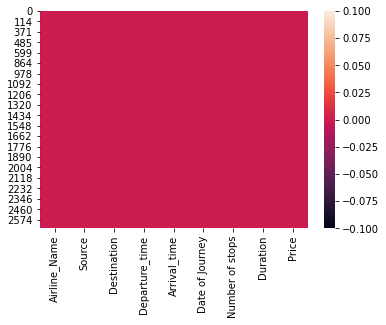

In [473]:
sns.heatmap(df.isnull())

in the above Data set there is none null valaues which is good.


### Feature Engineering

In [474]:
df.columns

Index(['Airline_Name', 'Source', 'Destination', 'Departure_time',
       'Arrival_time', 'Date of Journey', 'Number of stops', 'Duration',
       'Price'],
      dtype='object')

In [475]:
#Removing commas
df['Price']= df['Price'].str.replace(',','')

In [476]:
# converting object Dtype to int
df['Price']= df['Price'].astype(str).astype(int)


In [477]:
df['Price'].dtype

dtype('int32')

In [478]:
df.describe()

,Price
count,2375.000000
mean,11942.732632
std,4683.365111
min,6583.000000
25%,8055.000000
50%,10817.000000
75%,14250.000000
max,39014.000000


in the above observation we can see the highest ticket price is 39014 and the lowest ticket price is 6583 and an Average ticket price is 11942.

In [479]:
df['Date of Journey'].head()

0    Sat, 4 Jun
1    Sat, 4 Jun
2    Sat, 4 Jun
3    Sat, 4 Jun
4    Sat, 4 Jun
Name: Date of Journey, dtype: object

In [480]:
date=list(df['Date of Journey'])

In [481]:
# Extracting Day from Date of journey
sep = ','
Day=[]
for i in date:
    stripped = i.split(sep, 1)[0]
    Day.append(stripped)


In [482]:
# Extracting month from Date of journey
sep=' ' 
Month=[]
for i in date:
    stripped=i.split(sep,2)[2]
    Month.append(stripped)

In [483]:
# Extracting Date from Date of journey
sep=' '
Date=[]
for i in date:
    stripped=i.split(sep,2)[1]
    Date.append(stripped)

In [484]:
df['Day']=Day
df['Month']=Month
df['Date']=Date

In [485]:
df.head()

,Airline_Name,Source,Destination,Departure_time,Arrival_time,Date of Journey,Number of stops,Duration,Price,Day,Month,Date
0,Go First,New Delhi,Mumbai,06:05,10:20,"Sat, 4 Jun",1 Stop,4h 15m,8053,Sat,Jun,4
1,Go First,New Delhi,Mumbai,06:05,15:00,"Sat, 4 Jun",1 Stop,8h 55m,8053,Sat,Jun,4
2,SpiceJet,New Delhi,Mumbai,20:00,10:30\n+ 1 day,"Sat, 4 Jun",1 Stop,14h 30m,8053,Sat,Jun,4
3,IndiGo,New Delhi,Mumbai,06:30,08:35,"Sat, 4 Jun",Non Stop,2h 05m,8054,Sat,Jun,4
4,IndiGo,New Delhi,Mumbai,05:30,07:40,"Sat, 4 Jun",Non Stop,2h 10m,8054,Sat,Jun,4


In [486]:
# Extracting hour and minutes from Dep_Time

df['Dep_Hour'] = pd.DatetimeIndex(df['Departure_time']).hour
df['Dep_Minute'] = pd.DatetimeIndex(df['Departure_time']).minute

In [487]:
#Removing exrta string in Arrival time
sep='\n'
Arrival_Time=[]
for i in df['Arrival_time']:
    stripped=i.split(sep,1)[0]
    Arrival_Time.append(stripped)

In [488]:
df['Arrival_Time']=Arrival_Time

In [489]:
#Extracting hour and minutes from Arrival_Time
df['Arrival_Hour'] = pd.DatetimeIndex(df['Arrival_Time']).hour
df['Arrival_Minute'] = pd.DatetimeIndex(df['Arrival_Time']).minute

In [490]:
#Extracting total duration in seconds
import re
def convert_into_seconds(X):
    a = [int(s) for s in re.findall(r'-?\d+\.?\d*', X)]
    if len(a) == 2:
        hr = a[0] * 3600
        min = a[1] * 60
    else:
        hr = a[0] * 3600
        min = 0   
    total = hr + min
    return total

df['Duration(sec)'] = df['Duration'].map(convert_into_seconds)

In [491]:
df

,Airline_Name,Source,Destination,Departure_time,Arrival_time,Date of Journey,Number of stops,Duration,Price,Day,Month,Date,Dep_Hour,Dep_Minute,Arrival_Time,Arrival_Hour,Arrival_Minute,Duration(sec)
0,Go First,New Delhi,Mumbai,06:05,10:20,"Sat, 4 Jun",1 Stop,4h 15m,8053,Sat,Jun,4,6,5,10:20,10,20,15300
1,Go First,New Delhi,Mumbai,06:05,15:00,"Sat, 4 Jun",1 Stop,8h 55m,8053,Sat,Jun,4,6,5,15:00,15,0,32100
2,SpiceJet,New Delhi,Mumbai,20:00,10:30\n+ 1 day,"Sat, 4 Jun",1 Stop,14h 30m,8053,Sat,Jun,4,20,0,10:30,10,30,52200
3,IndiGo,New Delhi,Mumbai,06:30,08:35,"Sat, 4 Jun",Non Stop,2h 05m,8054,Sat,Jun,4,6,30,08:35,8,35,7500
4,IndiGo,New Delhi,Mumbai,05:30,07:40,"Sat, 4 Jun",Non Stop,2h 10m,8054,Sat,Jun,4,5,30,07:40,7,40,7800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2664,SpiceJet,New Delhi,Mumbai,06:25,16:10,"Sun, 19 Jun",1 Stop,9h 45m,20428,Sun,Jun,19,6,25,16:10,16,10,35100
2665,SpiceJet,New Delhi,Mumbai,09:50,16:10,"Sun, 19 Jun",1 Stop,6h 20m,22004,Sun,Jun,19,9,50,16:10,16,10,22800
2666,SpiceJet,New Delhi,Mumbai,09:25,16:10,"Sun, 19 Jun",1 Stop,6h 45m,22528,Sun,Jun,19,9,25,16:10,16,10,24300
2667,Go First,New Delhi,Mumbai,05:20,11:30,"Sun, 19 Jun",1 Stop,6h 10m,23788,Sun,Jun,19,5,20,11:30,11,30,22200


In [492]:
#Removing unnecessary columns
df.drop(['Departure_time','Arrival_time','Date of Journey','Duration'],axis=1,inplace=True)

In [493]:
df.head()

,Airline_Name,Source,Destination,Number of stops,Price,Day,Month,Date,Dep_Hour,Dep_Minute,Arrival_Time,Arrival_Hour,Arrival_Minute,Duration(sec)
0,Go First,New Delhi,Mumbai,1 Stop,8053,Sat,Jun,4,6,5,10:20,10,20,15300
1,Go First,New Delhi,Mumbai,1 Stop,8053,Sat,Jun,4,6,5,15:00,15,0,32100
2,SpiceJet,New Delhi,Mumbai,1 Stop,8053,Sat,Jun,4,20,0,10:30,10,30,52200
3,IndiGo,New Delhi,Mumbai,Non Stop,8054,Sat,Jun,4,6,30,08:35,8,35,7500
4,IndiGo,New Delhi,Mumbai,Non Stop,8054,Sat,Jun,4,5,30,07:40,7,40,7800


### EDA

In [494]:
len(df['Airline_Name'].unique())

6

In [495]:
df['Airline_Name'].value_counts()

Vistara      696
IndiGo       625
Air India    332
Go First     294
SpiceJet     265
Air Asia     163
Name: Airline_Name, dtype: int64

<AxesSubplot:xlabel='Airline_Name', ylabel='count'>

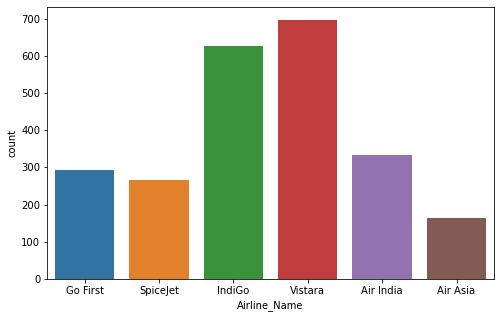

In [496]:
plt.figure(figsize=(8,5))
sns.countplot(df['Airline_Name'])


Vistara has hishest no of flights followed by Indigo and Air Asia have less no of flights.

In [497]:
len(df['Source'].unique())

1

In [498]:
df['Source'].value_counts()

New Delhi    2375
Name: Source, dtype: int64

In [499]:
len(df['Destination'].unique())

1

In [500]:
df['Destination'].value_counts()

Mumbai    2375
Name: Destination, dtype: int64

In [501]:
len(df['Number of stops'].unique())

3

In [502]:
df['Number of stops'].value_counts()

1 Stop       1623
Non Stop      738
2 Stop(s)      14
Name: Number of stops, dtype: int64

<AxesSubplot:xlabel='Number of stops', ylabel='count'>

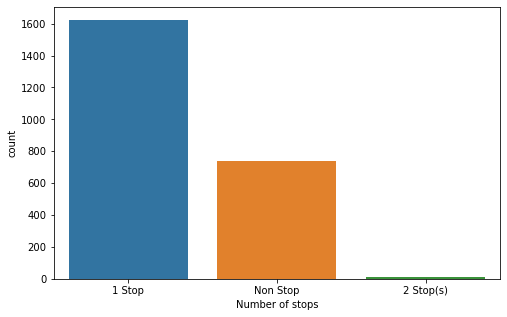

In [503]:
plt.figure(figsize=(8,5))
sns.countplot(df['Number of stops'])


1623 flights have 1 stop, 738 flights have non stop and only 14 flights have 2 stops.

In [504]:
len(df['Day'].unique())

7

In [505]:
df['Day'].value_counts()

Sun    517
Sat    505
Fri    363
Thu    341
Mon    325
Tue    168
Wed    156
Name: Day, dtype: int64

<AxesSubplot:xlabel='Day', ylabel='count'>

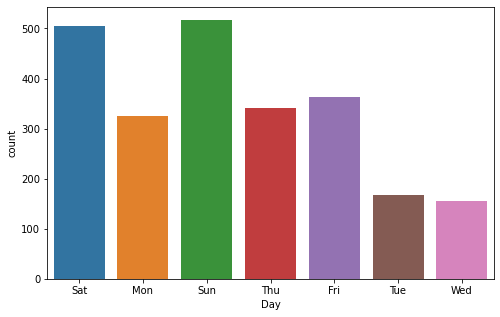

In [506]:
plt.figure(figsize=(8,5))
sns.countplot(df['Day'])

Highest no of flights on Sunday followed by saturday and very less no of flights on Wednesday.

In [507]:
len(df['Month'].unique())

1

In [508]:
df['Month'].value_counts()

Jun    2375
Name: Month, dtype: int64

In [509]:
len(df['Date'].unique())

14

In [510]:
df['Date'].value_counts()

17    186
19    182
10    177
18    177
11    177
9     174
5     171
14    168
16    167
12    164
6     163
13    162
15    156
4     151
Name: Date, dtype: int64

<AxesSubplot:xlabel='Date', ylabel='count'>

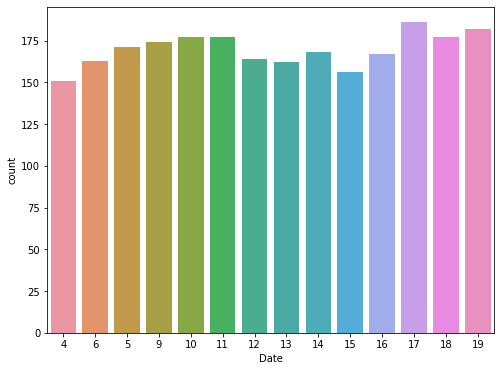

In [511]:
plt.figure(figsize=(8,6))
sns.countplot(df['Date'])

Highest no of flights on 17th and lowest no of flights on 4th.

In [512]:
len(df['Dep_Hour'].unique())

22

In [513]:
df['Dep_Hour'].value_counts()

6     191
10    167
5     163
7     158
21    156
9     155
17    149
18    148
20    142
8     127
19    118
14    104
13     95
12     95
16     86
11     78
22     76
15     76
0      26
4      26
2      25
23     14
Name: Dep_Hour, dtype: int64

<AxesSubplot:xlabel='Dep_Hour', ylabel='count'>

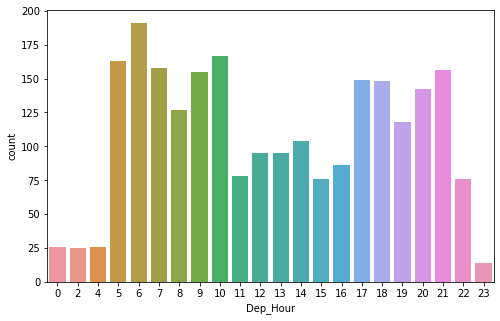

In [514]:
plt.figure(figsize=(8,5))
sns.countplot(df['Dep_Hour'])

Most of the flights Departure time is morning 5 to 10 am and evening 5 to 9 pm.


In [515]:
len(df['Arrival_Hour'].unique())

23

In [516]:
df['Arrival_Hour'].value_counts()

23    234
21    180
16    157
8     146
18    146
9     129
11    124
10    118
0     115
15    114
19    112
20    103
22    101
12     97
13     94
14     91
5      75
7      61
6      54
17     45
1      28
2      26
4      25
Name: Arrival_Hour, dtype: int64

<AxesSubplot:xlabel='Arrival_Hour', ylabel='count'>

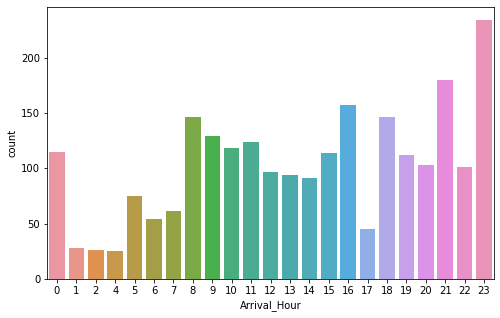

In [517]:
plt.figure(figsize=(8,5))
sns.countplot(df['Arrival_Hour'])

Most of the flights Arrival time is morning 8 to 11 am and evening 6 to 11 pm.

<AxesSubplot:xlabel='Airline_Name', ylabel='Price'>

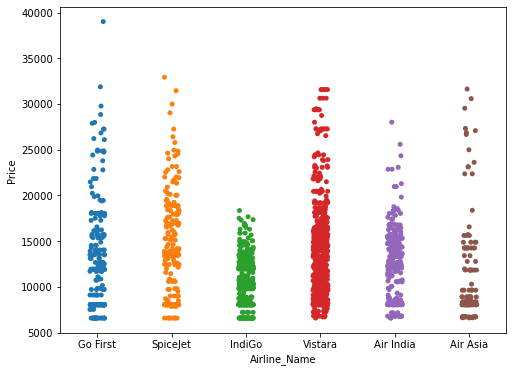

In [518]:
plt.figure(figsize=(8,6))
sns.stripplot(x='Airline_Name',y='Price',data=df)

In the above observation Go First shows highest price.

<AxesSubplot:xlabel='Number of stops', ylabel='Price'>

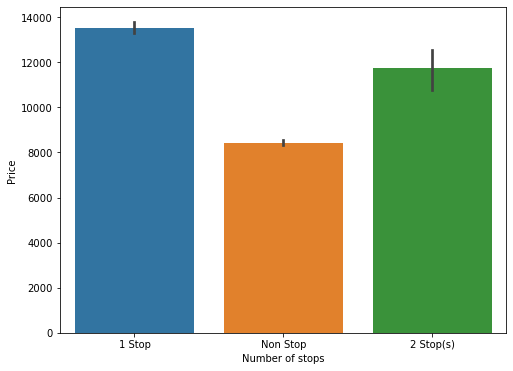

In [519]:
plt.figure(figsize=(8,6))
sns.barplot(x='Number of stops',y='Price',data=df)

In the above observation we can see that 1 stop flight price is high and non stop flight price is low. 

<AxesSubplot:xlabel='Date', ylabel='Price'>

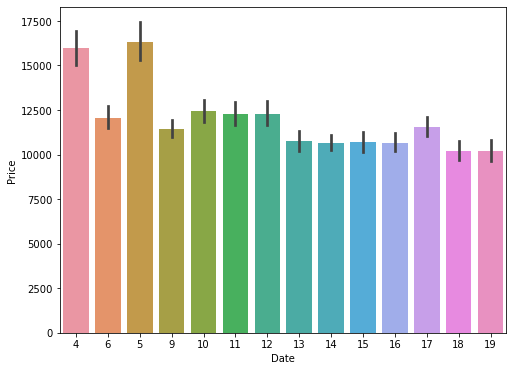

In [520]:
plt.figure(figsize=(8,6))
sns.barplot(x='Date',y='Price',data=df)

In the above observation we can see starting dates of the month flight price is high.

<AxesSubplot:xlabel='Day', ylabel='Price'>

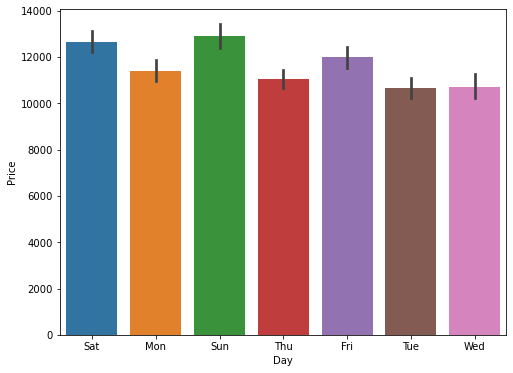

In [521]:
plt.figure(figsize=(8,6))
sns.barplot(x='Day',y='Price',data=df)

In the above graph we can see on saturday and sunday the flight price is high.

<AxesSubplot:xlabel='Dep_Hour', ylabel='Price'>

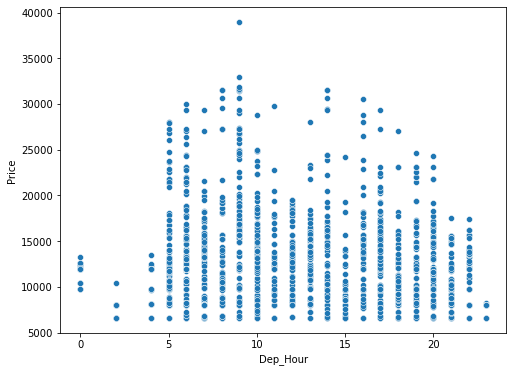

In [522]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Dep_Hour',y='Price',data=df)

In the above ghraph we can see that when departure time is in morning 5 to 10 AM and in evening 4 to 8 PM flight ticket price is high.

<AxesSubplot:xlabel='Arrival_Hour', ylabel='Price'>

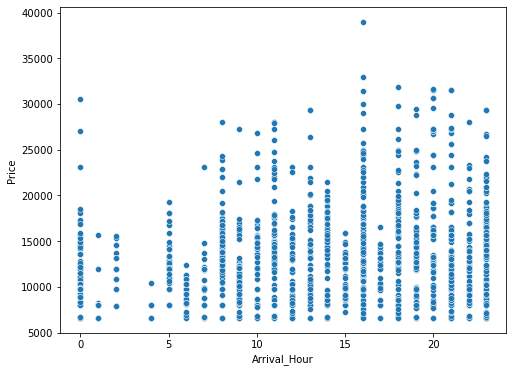

In [523]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Arrival_Hour',y='Price',data=df)

In the above ghraph we can see that when arrival time is in morning 8 to 11 AM and in evening 4 to 9 PM flight ticket price is high.

<AxesSubplot:xlabel='Duration(sec)', ylabel='Price'>

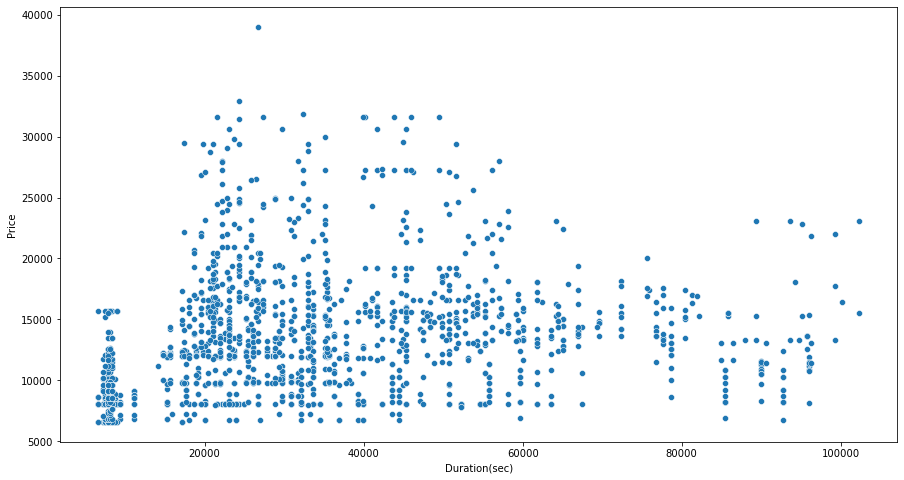

In [524]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Duration(sec)',y='Price',data=df)

In the above graph we can see that when the time duration is less flight ticket price is high.


In [525]:
df.corr()

,Price,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration(sec)
Price,1.000000,-0.095155,-0.020651,0.135746,0.037833,0.347304
Dep_Hour,-0.095155,1.000000,0.103040,-0.017351,-0.103086,0.080976
Dep_Minute,-0.020651,0.103040,1.000000,0.088788,0.037229,-0.048588
Arrival_Hour,0.135746,-0.017351,0.088788,1.000000,0.141795,-0.029827
Arrival_Minute,0.037833,-0.103086,0.037229,0.141795,1.000000,0.045012
Duration(sec),0.347304,0.080976,-0.048588,-0.029827,0.045012,1.000000


<AxesSubplot:>

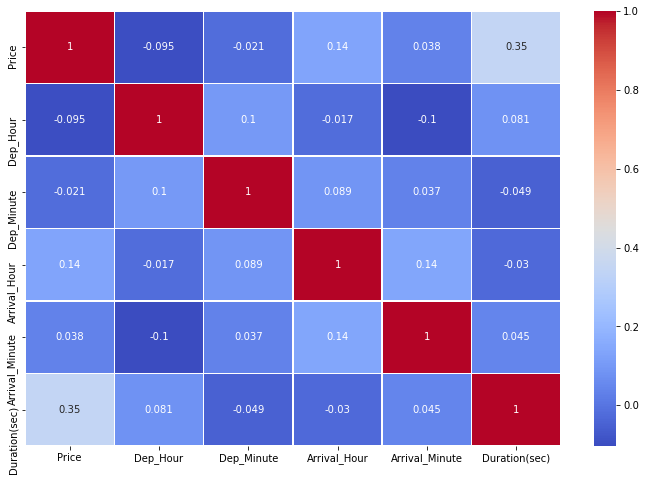

In [526]:
fig, axis = plt.subplots(figsize=(12, 8))
sns.heatmap(df.corr(),annot=True,linewidths=.5,cmap='coolwarm')

In the above ghraph we can see Price and Duration highly possitive correlated. 

In [527]:
df.head(5)

,Airline_Name,Source,Destination,Number of stops,Price,Day,Month,Date,Dep_Hour,Dep_Minute,Arrival_Time,Arrival_Hour,Arrival_Minute,Duration(sec)
0,Go First,New Delhi,Mumbai,1 Stop,8053,Sat,Jun,4,6,5,10:20,10,20,15300
1,Go First,New Delhi,Mumbai,1 Stop,8053,Sat,Jun,4,6,5,15:00,15,0,32100
2,SpiceJet,New Delhi,Mumbai,1 Stop,8053,Sat,Jun,4,20,0,10:30,10,30,52200
3,IndiGo,New Delhi,Mumbai,Non Stop,8054,Sat,Jun,4,6,30,08:35,8,35,7500
4,IndiGo,New Delhi,Mumbai,Non Stop,8054,Sat,Jun,4,5,30,07:40,7,40,7800


In [528]:
# Using Get_dummies function for converting catagory data.
df=pd.get_dummies(df,columns=['Airline_Name','Day'],drop_first=True)

In [529]:
# Using lable encoding 
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [530]:
df.head(5)

,Source,Destination,Number of stops,Price,Month,Date,Dep_Hour,Dep_Minute,Arrival_Time,Arrival_Hour,...,Airline_Name_Go First,Airline_Name_IndiGo,Airline_Name_SpiceJet,Airline_Name_Vistara,Day_Mon,Day_Sat,Day_Sun,Day_Thu,Day_Tue,Day_Wed
0,0,0,0,8053,0,10,6,5,39,10,...,1,0,0,0,0,1,0,0,0,0
1,0,0,0,8053,0,10,6,5,73,15,...,1,0,0,0,0,1,0,0,0,0
2,0,0,0,8053,0,10,20,0,40,10,...,0,0,1,0,0,1,0,0,0,0
3,0,0,2,8054,0,10,6,30,25,8,...,0,1,0,0,0,1,0,0,0,0
4,0,0,2,8054,0,10,5,30,20,7,...,0,1,0,0,0,1,0,0,0,0


In [531]:
df.dtypes

Source                    int32
Destination               int32
Number of stops           int32
Price                     int32
Month                     int32
Date                      int32
Dep_Hour                  int64
Dep_Minute                int64
Arrival_Time              int32
Arrival_Hour              int64
Arrival_Minute            int64
Duration(sec)             int64
Airline_Name_Air India    uint8
Airline_Name_Go First     uint8
Airline_Name_IndiGo       uint8
Airline_Name_SpiceJet     uint8
Airline_Name_Vistara      uint8
Day_Mon                   uint8
Day_Sat                   uint8
Day_Sun                   uint8
Day_Thu                   uint8
Day_Tue                   uint8
Day_Wed                   uint8
dtype: object

In [532]:
df.shape

(2375, 23)

now our data converted into int datatype and shape of our data is 2375 rows and 23 columns.

In [533]:
#Removing Unnecessary columns all these columns have only one type of valaue
df= df.drop(['Source','Destination','Month'],axis=1)

In [534]:
df.shape


(2375, 20)

In [535]:
df.skew()

Number of stops           0.803597
Price                     1.572402
Date                     -0.008619
Dep_Hour                  0.027084
Dep_Minute               -0.041442
Arrival_Time             -0.061736
Arrival_Hour             -0.370906
Arrival_Minute            0.191332
Duration(sec)             1.136118
Airline_Name_Air India    2.078841
Airline_Name_Go First     2.286069
Airline_Name_IndiGo       1.076386
Airline_Name_SpiceJet     2.468918
Airline_Name_Vistara      0.909909
Day_Mon                   2.114681
Day_Sat                   1.405532
Day_Sun                   1.369100
Day_Thu                   2.034130
Day_Tue                   3.350702
Day_Wed                   3.508591
dtype: float64

Normal Skewness range is -0.5 to 0.5 so some of the columns are out of range.

In [536]:
skewed_columns=["Duration(sec)","Price","Airline_Name_Air India","Airline_Name_Go First","Airline_Name_IndiGo","Airline_Name_SpiceJet","Airline_Name_Vistara","Day_Mon","Day_Sat","Day_Sun","Day_Thu","Day_Tue","Day_Wed"]

In [537]:
# Using log transformation 
for col in df[skewed_columns]:
    df[col]=np.log1p(df[col])

### Seperating data into independent and dependent variables.

In [539]:
x= df.drop('Price',axis=1)
y= df['Price']

In [542]:
# Standrization of Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [544]:
# Finding the best Random State
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best R2_score is",MaxAccu,'on random state',maxRS)

Best R2_score is 0.4841530207985999 on random state 193


In [545]:
# Creating Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

### Model Building


In [552]:
#Linear Regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)
lr_score=r2_score(y_test,y_pred)
print("R2 score from Linear regression is",lr_score)
lr_cv=cross_val_score(regressor,x,y,scoring='r2',cv=5).mean()
lr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',lr_mae)
lr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',lr_mse)
print("Cross validation score is ",lr_cv)

R2 score from Linear regression is 0.48415302079860023
Mean absolute error :  0.1917672574380691
Mean Squared error : 0.06530838233722003
Cross validation score is  -0.08347646652832967


In [553]:
# Support Vector Regression
from sklearn.svm import SVR
SR = SVR()
SR.fit(x, y)
y_pred=SR.predict(x_test)
svr_score=r2_score(y_test,y_pred)
print("R2 score from Support Vector regression is",svr_score)
svr_cv=cross_val_score(SR,x,y,scoring='r2',cv=5).mean()
svr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',svr_mae)
svr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',svr_mse)
print("Cross validation score is ",svr_cv)

R2 score from Support Vector regression is 0.7914280902865125
Mean absolute error :  0.11399255655791124
Mean Squared error : 0.026406075005926125
Cross validation score is  -0.209027854573082


In [554]:
# K nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
neigh.fit(x, y)
y_pred=neigh.predict(x_test)
knn_score=r2_score(y_test,y_pred)
print("R2 score from K Nearest Neighbors regression is",knn_score)
knn_cv=cross_val_score(neigh,x,y,scoring='r2',cv=5).mean()
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)
knn_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',knn_mse)
print("Cross validation score is ",knn_cv)

R2 score from K Nearest Neighbors regression is 0.714682007330707
Mean absolute error :  0.13312658988502657
Mean Squared error : 0.03612244968804843
Cross validation score is  0.025838554149467296


In [555]:
from sklearn.ensemble import RandomForestRegressor
RFR= RandomForestRegressor()
RFR.fit(x_train, y_train)
y_pred=RFR.predict(x_test)
rfr_score=r2_score(y_test,y_pred)
print("R2 score from Random Forest regression is",rfr_score)
rfr_cv=cross_val_score(RFR,x,y,scoring='r2',cv=5).mean()
rfr_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',rfr_mae)
rfr_mse=mean_squared_error(y_test,y_pred)
print('Mean Squared error :',rfr_mse)
print("Cross validation score is ",rfr_cv)

R2 score from Random Forest regression is 0.8323999136131035
Mean absolute error :  0.08793307048383679
Mean Squared error : 0.021218871027318866
Cross validation score is  0.25138951060744147


In [557]:
model=['Linear Regression','Support Vector Regressor','K Neighbors Regressor','Random Forest Regressor']

acc=[lr_score*100,svr_score*100,knn_score*100,rfr_score*100]
mae=[lr_mae,svr_mae,knn_mae,rfr_mae]
mse=[lr_mse,svr_mse,knn_mse,rfr_mse]
cv_score=[lr_cv*100,svr_cv*100,knn_cv*100,rfr_cv*100]

result=pd.DataFrame({'Model':model,'R2_score':acc,'Mean Absolute Error':mae,'Mean Squared Error':mse,'Cross validation_score':cv_score})
result
# Creting dataframe to store R2_score,Mae and cv score of all the models.

,Model,R2_score,Mean Absolute Error,Mean Squared Error,Cross validation_score
0,Linear Regression,48.415302,0.191767,0.065308,-8.347647
1,Support Vector Regressor,79.142809,0.113993,0.026406,-20.902785
2,K Neighbors Regressor,71.468201,0.133127,0.036122,2.583855
3,Random Forest Regressor,83.239991,0.087933,0.021219,25.138951


### Choosing the model

In the above models Random Forest Regressor gives 83.23% of accuracy with minimum MAE and MSE 


### Applying Hyper Perameter tunning for best accuracy

In [558]:
from sklearn.model_selection import GridSearchCV

In [576]:
parameters = { 
            "n_estimators"      : [10,50,100,200,300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8,10],
            "bootstrap": [True, False],
            }

In [577]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [578]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8, 10],
                         'n_estimators': [10, 50, 100, 200, 300]})

In [579]:
GCV.best_params_

{'bootstrap': False,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 200}

In [580]:
Final_Model=RandomForestRegressor(bootstrap=False,max_features='log2',min_samples_split=2,n_estimators=200)
Final_Model.fit(x_train,y_train)
y_pred=Final_Model.predict(x_test)
acc=r2_score(y_test,y_pred)
print("R2 Score of the model is ",acc*100)
knn_mae=mean_absolute_error(y_test,y_pred)
print('Mean absolute error : ',knn_mae)

R2 Score of the model is  82.50180534769905
Mean absolute error :  0.0938775223700257


### Conclusion
Here after trying with various model for the above dataset, I am going to choose Random forest regressor as the best model for pridicting the price of the flights.Randmon Forest Regressor not performs better with hyperparameter tuning, then we will go with default perameters.

In [581]:
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib


In [582]:
joblib.dump(Final_Model,'Final_Model.pkl')

['Final_Model.pkl']